# Data Generation Code

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
 
np.random.seed(42)
 
# Generate product data
def generate_product_data(n_products=100):
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty']
 
    products = pd.DataFrame({
        'product_id': range(1, n_products + 1),
        'category': np.random.choice(categories, size=n_products),
        'price': np.random.uniform(10, 1000, size=n_products).round(2),
        'stock_level': np.random.randint(0, 200, size=n_products)
    })
 
    return products
 
# Generate sales data for 6 months
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
 
    for date in dates:
        # Generate more sales for weekends
        n_sales = np.random.randint(
            50, 100 if date.weekday() >= 5 else 80
        )
 
        daily_sales = pd.DataFrame({
            'date': [date] * n_sales,
            'product_id': np.random.choice(products['product_id'], size=n_sales),
            'quantity': np.random.randint(1, 5, size=n_sales),
            'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
        })
        sales_list.append(daily_sales)
 
    sales_df = pd.concat(sales_list, ignore_index=True)
 
    # Add returned items
    sales_df['returned'] = np.random.choice(
        [0, 1],  
        size=len(sales_df),  
        p=[0.95, 0.05]  # 5% return rate
    )
 
    return sales_df
 
# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)

In [2]:
products_df

,product_id,category,price,stock_level
0,1,Home,915.81,10
1,2,Beauty,851.54,184
2,3,Books,454.96,177
3,4,Beauty,104.46,150
4,5,Beauty,377.11,158
...,...,...,...,...
95,96,Books,105.21,157
96,97,Beauty,941.12,45
97,98,Clothing,403.60,116
98,99,Clothing,522.57,5


In [3]:
sales_df

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0
...,...,...,...,...,...
12261,2023-12-31,30,1,0,0
12262,2023-12-31,52,1,0,0
12263,2023-12-31,79,3,0,0
12264,2023-12-31,20,2,1,0


# Basic Data Analysis

Checking whether there are any missing values in the dataframes.

In [4]:
products_df.isnull().sum()

product_id     0
category       0
price          0
stock_level    0
dtype: int64

In [5]:
sales_df.isnull().sum()

date                0
product_id          0
quantity            0
discount_applied    0
returned            0
dtype: int64

In [6]:
# Checking the daily count of items sold

sales_df. \
    groupby('date')['quantity']. \
        agg(daily_sales='count'). \
        reset_index()   

,date,daily_sales
0,2023-07-01,90
1,2023-07-02,99
2,2023-07-03,58
3,2023-07-04,57
4,2023-07-05,56
...,...,...
179,2023-12-27,56
180,2023-12-28,64
181,2023-12-29,73
182,2023-12-30,62


# Sales Analysis

In [7]:
products_df = products_df.set_index('product_id')
sales_df = sales_df.set_index('product_id')

In [8]:
productsales = products_df.join(sales_df, how='inner')
productsales = productsales.reset_index(names='product_id')

In [9]:
productsales

,product_id,category,price,stock_level,date,quantity,discount_applied,returned
0,1,Home,915.81,10,2023-07-02,3,0,0
1,1,Home,915.81,10,2023-07-02,1,0,0
2,1,Home,915.81,10,2023-07-04,3,1,0
3,1,Home,915.81,10,2023-07-05,2,1,0
4,1,Home,915.81,10,2023-07-09,2,0,1
...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0
12262,100,Electronics,839.33,98,2023-12-21,4,0,0
12263,100,Electronics,839.33,98,2023-12-23,1,0,0
12264,100,Electronics,839.33,98,2023-12-24,1,0,0


In [10]:
productsales['revenue'] = (productsales['quantity'] - productsales['discount_applied'] - productsales['returned']) * productsales['price']

In [11]:
productsales['sold'] = productsales['quantity'] - productsales['returned']

In [12]:
productsales.sort_values(by='revenue', ascending=False).head(10)

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sold
8127,66,Home,997.76,32,2023-12-03,4,0,0,3991.04,4
8134,66,Home,997.76,32,2023-12-17,4,0,0,3991.04,4
8139,66,Home,997.76,32,2023-12-23,4,0,0,3991.04,4
8131,66,Home,997.76,32,2023-12-11,4,0,0,3991.04,4
8095,66,Home,997.76,32,2023-10-04,4,0,0,3991.04,4
8123,66,Home,997.76,32,2023-11-22,4,0,0,3991.04,4
8057,66,Home,997.76,32,2023-08-16,4,0,0,3991.04,4
8043,66,Home,997.76,32,2023-07-23,4,0,0,3991.04,4
8081,66,Home,997.76,32,2023-09-23,4,0,0,3991.04,4
8084,66,Home,997.76,32,2023-09-25,4,0,0,3991.04,4


In [16]:
top_sold = productsales. \
    groupby('product_id')['sold']. \
    agg(total_sold = 'sum'). \
    reset_index()

top_sold.sort_values('total_sold', ascending=False).head(10)

# Top 10 Products by Quantity of items sold

,product_id,total_sold
14,15,362
2,3,360
86,87,360
66,67,351
8,9,350
57,58,348
5,6,346
73,74,345
27,28,342
46,47,341


In [17]:
top_rev = productsales. \
    groupby('product_id')['revenue']. \
    agg(total_revenue = 'sum'). \
    reset_index()

top_rev.sort_values(by='total_revenue', ascending=False).head(10)

# Top 10 Products by Revenue

,product_id,total_revenue
29,30,276424.99
11,12,263409.29
67,68,253981.00
0,1,251847.75
96,97,250337.92
82,83,247864.68
32,33,247746.46
12,13,240668.86
65,66,237466.88
21,22,231376.98


In [18]:
sales_df['month'] = sales_df['date'].dt.month

In [19]:
sales_df['week'] = sales_df['date'].dt.day_of_week

In [20]:
sales_df

,date,quantity,discount_applied,returned,month,week
product_id,,,,,,
37,2023-07-01,3,0,0,7,5
24,2023-07-01,3,0,0,7,5
93,2023-07-01,3,0,0,7,5
46,2023-07-01,4,0,0,7,5
53,2023-07-01,4,1,0,7,5
...,...,...,...,...,...,...
30,2023-12-31,1,0,0,12,6
52,2023-12-31,1,0,0,12,6
79,2023-12-31,3,0,0,12,6


In [21]:
productsales

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sold
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,3
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,1
2,1,Home,915.81,10,2023-07-04,3,1,0,1831.62,3
3,1,Home,915.81,10,2023-07-05,2,1,0,915.81,2
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1
...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,1
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,4
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,1
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,1


In [22]:
productsales['month'] = productsales['date'].dt.month

In [23]:
productsales['week'] = productsales['date'].dt.day_of_week

In [24]:
productsales

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sold,month,week
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,3,7,6
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,1,7,6
2,1,Home,915.81,10,2023-07-04,3,1,0,1831.62,3,7,1
3,1,Home,915.81,10,2023-07-05,2,1,0,915.81,2,7,2
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,1,12,2
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,4,12,3
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,1,12,5
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,1,12,6


In [25]:
# Finding out daily sales

productsales. \
            groupby('week')['sold']. \
            agg(items_sold = 'sum'). \
            reset_index()

,week,items_sold
0,0,4043
1,1,4110
2,2,4189
3,3,4040
4,4,4004
5,5,4749
6,6,4813


In [26]:
# According to the data the sales are much better on weekends (5&6) Saturday & Sunday.

In [27]:
# Finding out the monthly sales
productsales. \
        groupby('month')['sold']. \
        agg(items_sold = 'sum'). \
        reset_index()

,month,items_sold
0,7,5037
1,8,4910
2,9,4962
3,10,5002
4,11,4900
5,12,5137


In [28]:
# Monthly sales does not show much difference in sales.

# # Category Performance 

In [29]:
cat_rev = productsales. \
    groupby('category')['revenue']. \
    agg(revenue = 'sum'). \
    reset_index().sort_values(by='revenue', ascending=False)

cat_rev

,category,revenue
4,Home,3051482.96
0,Beauty,2832652.60
2,Clothing,2640436.67
1,Books,2131575.84
3,Electronics,2118280.14


In [30]:
productsales. \
    groupby('category')['quantity']. \
    agg(avg_order_size = 'mean'). \
    reset_index().sort_values(by='avg_order_size', ascending=False)

,category,avg_order_size
2,Clothing,2.524952
4,Home,2.498255
1,Books,2.487620
0,Beauty,2.480694
3,Electronics,2.455122


In [31]:
productsales. \
    groupby('category')['returned']. \
    agg(return_rate = 'mean'). \
    reset_index().sort_values(by='return_rate', ascending=False)

,category,return_rate
2,Clothing,0.054476
1,Books,0.050531
0,Beauty,0.050325
3,Electronics,0.047597
4,Home,0.046017


In [32]:
cat_rev['category']

4           Home
0         Beauty
2       Clothing
1          Books
3    Electronics
Name: category, dtype: object

In [33]:
cat_rev['revenue']

4    3051482.96
0    2832652.60
2    2640436.67
1    2131575.84
3    2118280.14
Name: revenue, dtype: float64

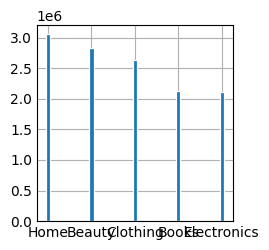

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = cat_rev['category']
y = cat_rev['revenue']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)



plt.show()